# The material presented in this notebook is for using in Introduction to Deep Learning ECE.685D course, Duke University, Fall 2023.

# Working with Data and Models in Pytorch

* ## Review of the general learning procedure in Part 1: Pytorch_Fundamentals.  


* ## Loading data:
    * ### Public common datasets: 
    access the data by the Pytorch build-in package torchvision, torchaudio and torchtext, and then load it by torch.utils.data.DataLoader;
    * ### Private datasets:
    access and load the data by adding new custom datasets. The dataset should inherit from the standard torch.utils.data.Dataset class, including "__getitem__" and "__len__".
* ## Saving and loading models:
    * ### save and load the entire model including the model architecture.
    * ### save and load trained parameters of the model.

## I. Training and Testing for supervised learning

### Training,
Train a model to fit given data, $\{(x_i, y_i)\}_{i=1}^n\to \text{Algorithm} \to f$. 

#### The training process takes time in a form of iteratively training with the data.   
**One batch**: one minibatch (usually shuffled) of data  
**One iteration**: train the model with one batch of data  
**One epoch**: train the model iteratively till traversed the entire dataset


    for epoch in range(total_epoch): # one epoch

        for i_batch, batch in enumerate(trainloader):  # one iteration
            
            X = batch[0]
            Y = batch[1]
            ...
            optimizer.zero_grad()  
            y_pred = model(X)
            loss =  mse(y_pred, Y)
            loss.backward()
            optimizer.step()
            ...
        
### Testing,
Evaluate how well the model match some new income data, $\mathcal{L}(f(x), y)$.

    for epoch in range(total_epoch):

        for i_batch, batch in enumerate(trainloader):   
            ...
        for i_batch, batch in enumerate(testloader):
            ...

After learning, we hope
1. The algorithm is able to train $f$ well, saying small training errors.
2. The trained model $f$ is able to match the pattern of new data well, saying small testing errors.

With small training error, hopefully the testing error will be small.

## How do we define a batch of data? 
Original data -> random shuffle -> queue of minibatches for iterative training. 


## II. Loading Data

#### Two Steps:
(1) **Dataset:** Define the class of data inheriting from the standard torch.utils.data.Dataset class.

    a. define __init__ to store the path of the downloaded/local dataset.
    
    b. define __getitem__, return index of items in the dataset.
    
    c. define __len__, return the size of the dataset.
(2) **Dataloader:** Pass it to torch.utils.data.DataLoader and get the dataloader of your private dataset.


### 1. Custom the Dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# class dataset(torch.utils.data.Dataset):
#     def __init__(self, root, transform=None):
#         ### where you define your data source

#         self.image_list = ...# usually the path
#         self.label_list = ...

#     def __getitem__(self, index):    
#         ## where you define the method of loading data and preprocess

#         image = imread(self.image_list[index]) # load data from the path you defined
#         label = imread(self.label_list[index])

#         Your data pre-processing here...

#         return image, label

#     def __len__(self):        
#         return len(self.image_list) # use size of your dataset to generate index

In [2]:
X = np.random.rand(100,10)
Y = np.random.rand(100)

class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, X, Y, transform = None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        data = torch.tensor(X[idx,:])
        label = Y[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data, label

### Defining Dataloader with the custom Dataset

In [3]:
custom_dataset = CustomDataset(X,Y) ## the __init__ function
custom_dataloader = torch.utils.data.DataLoader(custom_dataset, batch_size=20, shuffle=True)

In [5]:
# later in the training:

# for epoch in range(total_epoch):
#     for i_batch, batch in enumerate(trainloader):    ### __getitem__ function
        


### 2. Create Dataset with the Pytorch build-in packages, such as torchvision, torchtext, torchaudio

### An Example of datasets in torchvision, MNIST

All datasets are subclasses of torch.utils.data.Dataset, with name of the format torchvision.datasets."__Name of Dataset__"
* They have __getitem__ and __len__ methods implemented. 
* They can all be passed to a torch.utils.data.DataLoader
https://pytorch.org/docs/stable/torchvision/datasets.html

"__Name of Dataset__" includes many datasets such as MNIST, Fashion-MNIST, ImageNet, CIFAR10, SVHN, COCO, LSUN, and so on.

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform = transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:01<00:00, 8417091.75it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 1148575.79it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 8047770.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 1919835.61it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



length of trainset: 60000


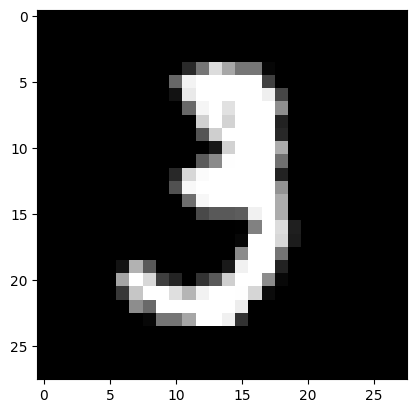

label: 3


In [25]:
# check len of and data at index 10 of trainset
print(f'length of trainset: {len(trainset)}')
data, label = trainset[10]
fig = plt.figure()
plt.imshow(data[0], cmap='gray')
plt.show()
print(f'label: {label}')

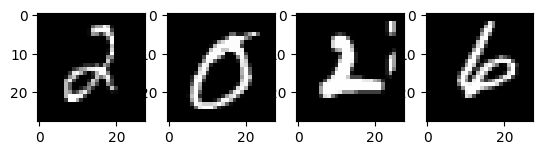

tensor([2, 0, 2, 6])
number of items in batch: torch.Size([64])


In [26]:
#iterate over one batch of training set
dataiter = iter(trainloader)
images, labels = next(dataiter)
im = images[0:4]
fig , ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(im[i][0], cmap='gray')
plt.show()
print(labels[0:4])

print(f'number of items in batch: {labels.shape}')

## Add transformation to the dataset
Note that Transforms are common image transformations for data augmentation. 

* __transforms.CenterCrop__ :  Crops the given image at the center according to the given size. 
* __transforms.ColorJitter__ :  Randomly change the brightness, contrast and saturation of an image.
* __transforms.Grayscale__ : Convert image to grayscale.
* __transforms.Resize__ : Resize the input image to the given size.
* __transforms.Normalize(mean, std, inplace=False)__ : Normalize tensor images with mean and standard deviation. It cannot take PIL image, so you need to transform the images into tensors first


They can be chained together by transforms.Compose():

In [7]:

transforms.Compose([
    transforms.CenterCrop(10),
    transforms.ToTensor()
])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

In [10]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, 
transform = transforms.Compose([
    transforms.CenterCrop(10),
    transforms.ToTensor()
]))

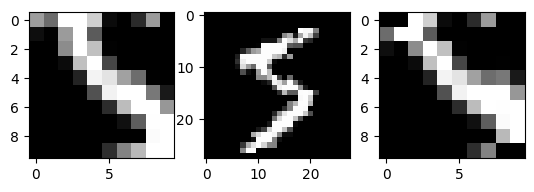

In [27]:
# Visualize transforms and Composed transform
trainingset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
img = trainingset[0][0]

CCrop = transforms.CenterCrop(10)
RandomRotation = transforms.RandomRotation(degrees=30)
Compose = transforms.Compose([CCrop,
                             RandomRotation])
fig , ax = plt.subplots(1,3)
for i, transform in enumerate([CCrop, RandomRotation, Compose]):
    ax[i].imshow(transform(img), cmap='gray')
plt.show()

## III. Saving and Loading a Model

What we want to save and load?
1. The model parameters, including weights and biases.
2. The model architecture.

Three functions to be familiar with:
* torch.save(arg, PATH)
* torch.load(PATH)
* model.load_state_dict(arg)

What is state_dict?
model.state_dict() is simply a Python dictionary object that maps each layer to its parameter tensor.

### An example of a linear regression model

In [31]:
# Define model2
class Linear_Reg(nn.Module):
    def __init__(self):
        super(Linear_Reg, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

# Initialize model
model = Linear_Reg()

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    print(model.state_dict()[param_tensor], "\t")
    
# Print model's parameters()
for param, value in model.named_parameters():
    print(param, "\t", value)

Model's state_dict:
linear.weight 	 torch.Size([1, 10])
tensor([[ 0.2064, -0.0840,  0.1912, -0.1403,  0.0678,  0.1554, -0.2905, -0.0175,
         -0.1083,  0.0714]]) 	
linear.bias 	 torch.Size([1])
tensor([0.1316]) 	
linear.weight 	 Parameter containing:
tensor([[ 0.2064, -0.0840,  0.1912, -0.1403,  0.0678,  0.1554, -0.2905, -0.0175,
         -0.1083,  0.0714]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([0.1316], requires_grad=True)


###  1- Save/Load state_dict 

In [13]:
PATH = './ckpt_state_dics.pth'
torch.save(model.state_dict(), PATH)   # Saving

In [14]:
model = Linear_Reg()
# Print model's parameters() before loading state dict
for param, value in model.named_parameters():
    print(param, "\t", value)

linear.weight 	 Parameter containing:
tensor([[-0.1766, -0.0383, -0.1377, -0.1159,  0.0586,  0.2908,  0.3062, -0.1886,
         -0.0550,  0.1379]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([-0.1992], requires_grad=True)


In [15]:
model.load_state_dict(torch.load(PATH))  # Loading

# Print model's parameters() after loading saved state dict
for param, value in model.named_parameters():
    print(param, "\t", value)

linear.weight 	 Parameter containing:
tensor([[-0.1929,  0.2071,  0.0317,  0.1119,  0.0340,  0.2538, -0.3159,  0.2673,
          0.0431, -0.0183]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([-0.0212], requires_grad=True)


When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s __state_dict__ with the __torch.save()__ function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

###  2- Save/Load Entire Model

In [16]:
PATH = './ckpt_entire.pth'
torch.save(model, PATH)


/Users/nessie/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Linear_Reg. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [24]:
#Model class must be defined somewhere
model = torch.load(PATH)


In [25]:
for param, value in model.named_parameters():
    print(param, "\t", value)

linear.weight 	 Parameter containing:
tensor([[-0.1929,  0.2071,  0.0317,  0.1119,  0.0340,  0.2538, -0.3159,  0.2673,
          0.0431, -0.0183]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([-0.0212], requires_grad=True)


### 3- Load Exitsing Model from TorchVision

In [18]:
net = torchvision.models.alexnet(pretrained=True)

print(net)
print(net.features[0].weight)

# list of models: https://pytorch.org/vision/stable/models.html

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Additional reading: saving and loading checkpoints
https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html

In [19]:
# define model, optimizer and criterion
model = Linear_Reg()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

In [20]:
# saving checkpoint at epoch 3
EPOCHS = 5
CHKPT_PATH = './chkpt_linear_reg.pt'
for epoch in range(EPOCHS):
    train_loss = 0
    for batch_idx, (data, label) in enumerate(custom_dataloader):
        data = torch.autograd.Variable(data.float())
        label = torch.autograd.Variable(label.float())
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, label.view(label.shape[0],1))
        loss.backward()
        optimizer.step()
        train_loss += loss

    if epoch == 3:
        torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
                }, CHKPT_PATH)

    print(f'Epoch: {epoch}, train loss: {train_loss}')


Epoch: 0, train loss: 8.2701416015625
Epoch: 1, train loss: 7.9068922996521
Epoch: 2, train loss: 7.552255153656006
Epoch: 3, train loss: 7.216434478759766
Epoch: 4, train loss: 6.888947010040283


In [21]:
# Load from checkpoint
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load(CHKPT_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

print(epoch, loss)

3 tensor(1.5946, requires_grad=True)
